In [2]:
from config import *
import utilities as utils

import importlib

In [ ]:
importlib.reload(utils)

In [3]:
year_files_dict = utils.get_all_filenames()

In [4]:
# Number of US Only articles

US_ONLY = ['N2:US']

year_month_article_count = dict()

# FIX: Range should ideally remain 1996 - 2021
for year in range(1996, 2021):
    year_month_article_count[str(year)] = dict()
    for fname in year_files_dict[str(year)]:
        month = fname[-11:-9]
        if month in year_month_article_count[str(year)]:
            continue
        data = utils.load_data(fname)
        count = utils.filtered_article_count(data, subjects=US_ONLY)
        print(year, month, count)
        year_month_article_count[str(year)][month] = count


1996 11 16240
1996 02 17112
1996 09 16034
1996 03 16201
1996 05 16142
1996 04 14320
1996 10 19056
1996 12 16198
1996 06 12332
1996 08 14559
1996 07 16958
1996 01 15059
1997 03 18847
1997 06 21282
1997 05 20984
1997 12 27965
1997 11 30107
1997 01 17158
1997 08 24025
1997 02 18880
1997 07 23950
1997 10 35407
1997 04 21811
1997 09 25564
1998 06 42230
1998 10 47213
1998 12 32983
1998 03 44433
1998 05 44003
1998 02 20642
1998 09 38387
1998 01 26259
1998 11 39156
1998 04 45996
1998 07 41095
1998 08 40535
1999 06 37239
1999 10 35184
1999 11 32013
1999 03 43305
1999 04 44360
1999 09 31012
1999 01 37953
1999 02 39207
1999 05 36976
1999 07 39055
1999 08 31898
1999 12 27547
2000 08 28265
2000 05 29910
2000 10 34228
2000 12 25244
2000 03 30492
2000 04 29124
2000 09 28890
2000 07 30525
2000 01 32736
2000 11 30139
2000 02 33988
2000 06 28522
2001 12 26839
2001 11 33299
2001 08 30410
2001 03 30605
2001 04 26325
2001 07 36599
2001 05 30383
2001 06 33342
2001 10 42411
2001 01 34151
2001 09 35209
2001 0

In [5]:
import matplotlib.pyplot as plt

In [6]:
import pandas as pd

In [7]:
df = pd.DataFrame.from_dict({year+month: year_month_article_count[year][month] 
                             for year in year_month_article_count 
                             for month in year_month_article_count[year]}, orient='index')

In [8]:
df.index = pd.to_datetime(df.index, format='%Y%m')

In [9]:
df.sort_index(inplace=True)
df.rename(columns={0: 'Count'}, inplace=True)
df['date'] = df.index


In [10]:
df.Count.sum()

19878246

In [11]:
df

,Count,date
1996-01-01,15059,1996-01-01
1996-02-01,17112,1996-02-01
1996-03-01,16201,1996-03-01
1996-04-01,14320,1996-04-01
1996-05-01,16142,1996-05-01
...,...,...
2020-05-01,84401,2020-05-01
2020-06-01,88838,2020-06-01
2020-07-01,96709,2020-07-01
2020-08-01,91665,2020-08-01


In [13]:
df1 = df.groupby(df['date'].dt.to_period('M')).sum()
df1 = df1.resample('M').asfreq().fillna(0)

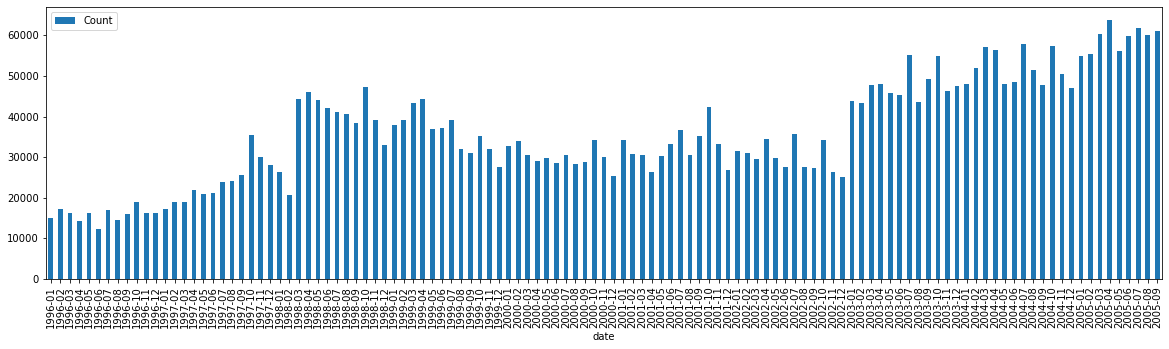

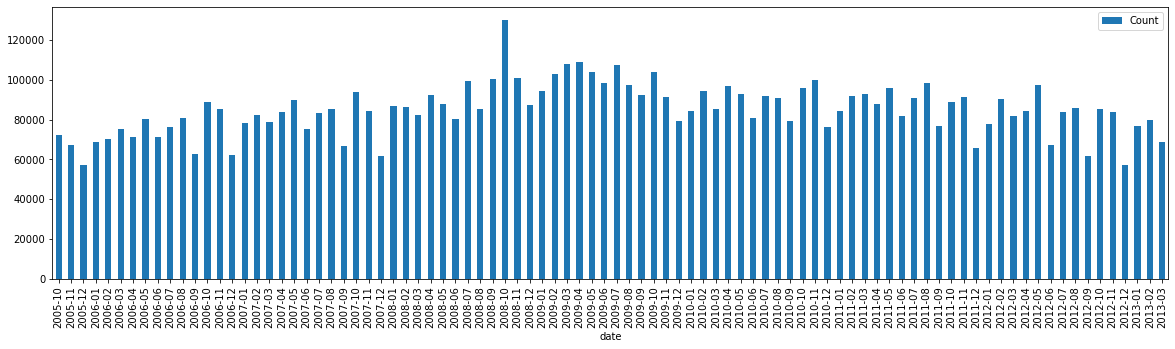

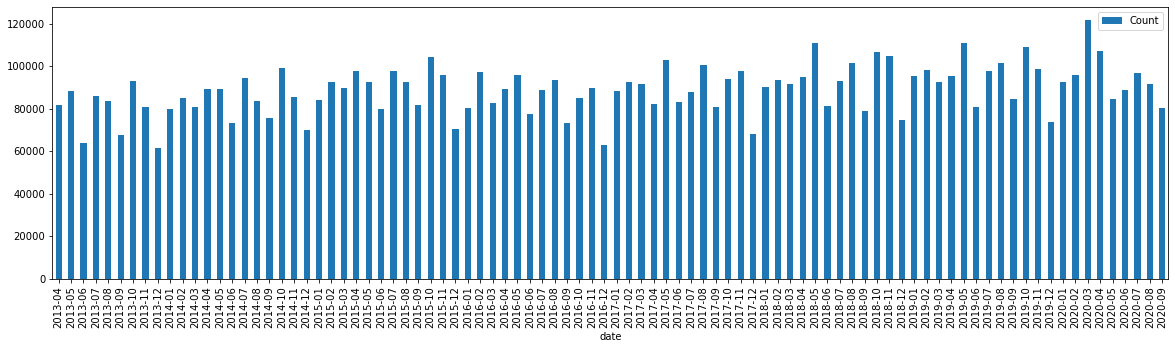

In [14]:
df1.iloc[:-180].plot(kind='bar', figsize=(20,5))
df1.iloc[-180:-90].plot(kind='bar', figsize=(20,5))
df1.iloc[-90:].plot(kind='bar', figsize=(20,5))

In [16]:
import os

In [17]:
df.reset_index(drop=True).to_csv(os.path.join(TEMP_PATH, 'All_US_Article_Count.csv'))

In [ ]:
# Next step would be to filter based on words. 
# But first, we would need to model all of these article-words onto a single tf-idf.
# Find the most similar words to 'inflation', 'growth', 'volatility'
# Then do the next stage of filtering articles based on the occurence of these words in the articles.